In [ ]:
pip install mysql-connector-python
pip install gapminder

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gapminder
from gapminder import gapminder
import sqlite3
import mysql.connector

In [17]:
mydb = mysql.connector.connect(host='localhost', 
                               port='3306', 
                               user='root', 
                               passwd='Abcd1234@', 
                               db="HospitalManagementSystem", 
                               auth_plugin='mysql_native_password', 
                               buffered=True)

In [18]:
mycursor = mydb.cursor()


In [19]:
mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x)

('HospitalManagementSystem',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


In [20]:
mycursor.execute("SHOW TABLES")

In [21]:
for x in mycursor:
    print(x)

('DEPARTMENTS',)
('DOCTOR_ON_CALL',)
('DOCTORS',)
('DUTY_DOC',)
('PATIENT_ADMIT',)
('PATIENT_DIAGNOSE',)
('PATIENT_DISCHARGE',)
('PATIENT_ENTRY',)
('PATIENT_OPERATED',)
('PATIENT_REGULAR',)


### What is the distribution of doctor specializations?

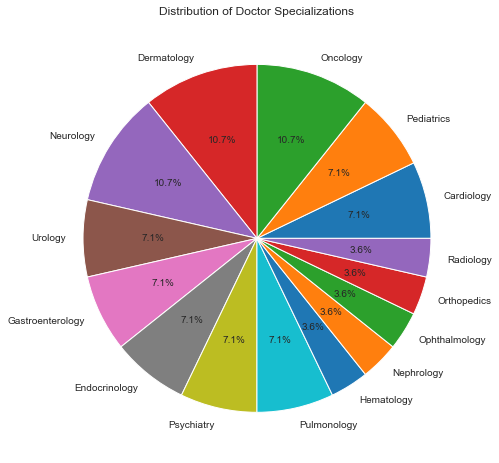

In [22]:
mycursor = mydb.cursor()
query1 = "SELECT SPECIALIZATION, COUNT(*) as COUNT FROM DOCTORS GROUP BY SPECIALIZATION"
mycursor.execute(query1)

# Fetch results
results1 = mycursor.fetchall()

# Create a pandas dataframe from the results
df1 = pd.DataFrame(results1, columns=["Specialization", "Count"])

# Create the pie chart using matplotlib
plt.figure(figsize=(10,8))
plt.title("Distribution of Doctor Specializations")
plt.pie(x=df1['Count'], labels=df1['Specialization'], autopct='%1.1f%%')
plt.show()

### What is the distribution of patient counts by department?

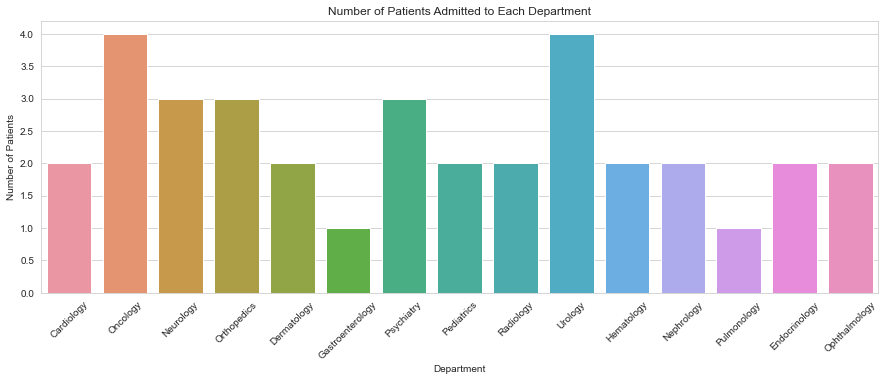

In [23]:
## Bar chart of patient count by department:

query2 = """
SELECT DEPT_NAME, 
COUNT(*) FROM PATIENT_ENTRY JOIN DEPARTMENTS 
ON PATIENT_ENTRY.DEPT_ID = DEPARTMENTS.DEPT_ID 
GROUP BY DEPT_NAME;
"""

# Creating dataframe from query result
df2 = pd.read_sql(query2, mydb)

# Creating bar chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
plt.title("Number of Patients Admitted to Each Department")
sns.barplot(x='DEPT_NAME', y='COUNT(*)', data=df2)
plt.xlabel("Department")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()


### What is the number of patients diagnosed by doctors in each specialization?

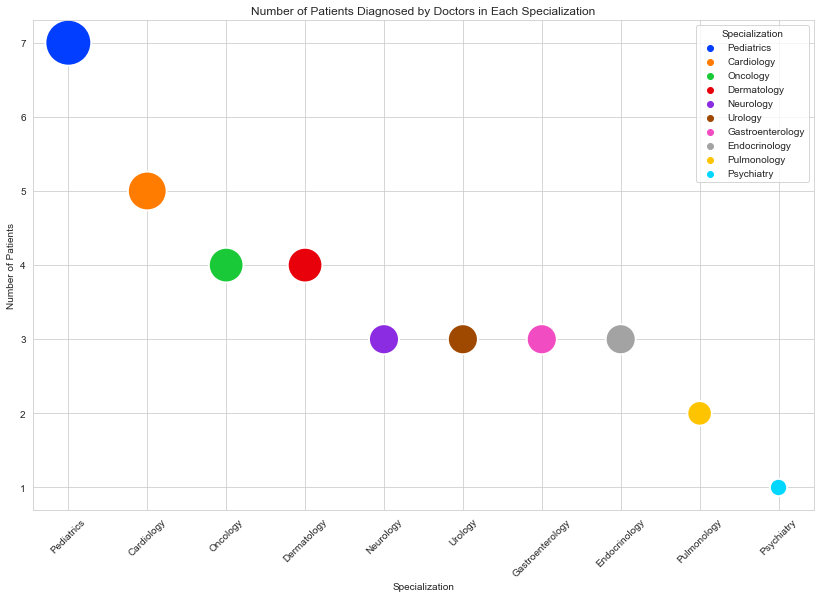

In [24]:
# Query to get number of patients diagnosed by doctors in each specialization
query3 = """
SELECT DOCTORS.SPECIALIZATION, 
COUNT(*) AS NUM_PATIENTS 
FROM PATIENT_DIAGNOSE JOIN DOCTORS 
ON PATIENT_DIAGNOSE.DOC_ID = DOCTORS.DOC_ID 
GROUP BY DOCTORS.SPECIALIZATION 
ORDER BY NUM_PATIENTS DESC
"""

# Executing query
mycursor.execute(query3)

# Fetching data
data3 = mycursor.fetchall()

# Converting data to pandas dataframe
df3 = pd.DataFrame(data3, columns=['Specialization', 'Num_Patients'])

# Creating scatter plot using seaborn
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df3, 
                x="Specialization", 
                y="Num_Patients", 
                s=df3['Num_Patients']*300, 
                hue="Specialization", 
                palette="bright")
plt.title("Number of Patients Diagnosed by Doctors in Each Specialization")
plt.xlabel("Specialization")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)

# Displaying plot
plt.show()



### What is the Most Common Diagonosis for the patients?

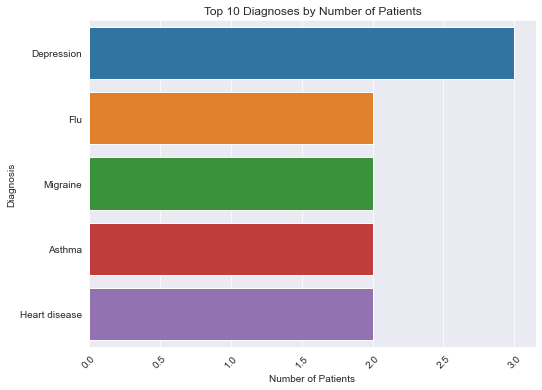

In [25]:

query4 = """
SELECT DIAGNOSIS, 
COUNT(*) AS NUM_PATIENTS 
FROM PATIENT_DIAGNOSE 
GROUP BY DIAGNOSIS 
ORDER BY NUM_PATIENTS DESC LIMIT 5
"""
mycursor.execute(query4)

# Fetching data
data4 = mycursor.fetchall()

# Creating a Pandas DataFrame from the data
df4 = pd.DataFrame(data4, columns=['Diagnosis', 'Number of Patients'])

# Creating a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.barplot(x='Number of Patients', y='Diagnosis', data=df4, orient = 'h')

# Adding labels and title
plt.xlabel('Number of Patients')
plt.ylabel('Diagnosis')
plt.title('Top 10 Diagnoses by Number of Patients')
plt.xticks(rotation=45)


# Displaying plot
plt.show()


### What is the Male to Female Ratio for the patients?

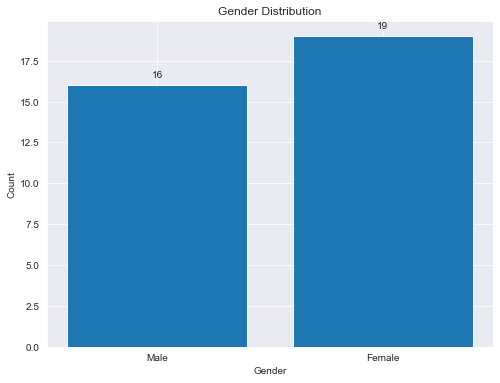

In [26]:
a = mycursor.execute('''SELECT sex, COUNT(*) as count FROM 
    `HospitalManagementSystem`.PATIENT_ENTRY GROUP BY sex;''')

mycursor.execute(a)
myresult = mycursor.fetchall()
df5 = pd.DataFrame(myresult, columns=['gender', 'count'])

plt.figure(figsize=(8, 6))
plt.bar(df5['gender'], df5['count'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts above bars
for i, v in enumerate(df5['count']):
    plt.text(i, v + 1/2, str(v), ha='center')

plt.show()

### What was the Payment method used by Patients?

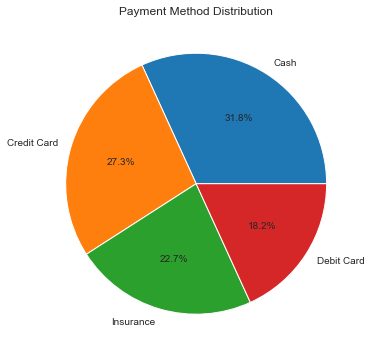

In [27]:
b = mycursor.execute('''SELECT PATIENT_ADMIT.PAYMENT_MODE, COUNT(*) as payment_count
                    FROM `HospitalManagementSystem`.PATIENT_ADMIT
                    GROUP BY PAYMENT_MODE;''')
mycursor.execute(b)
myresult = mycursor.fetchall()
payment = pd.DataFrame(myresult, columns=['payment_mode', 'payment_count'])
payment
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment['payment_count'], labels=payment['payment_mode'], autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()

In [15]:
mycursor.close()
mydb.close()